<a href="https://colab.research.google.com/github/kavicastelo/colab/blob/google/fertilizer_soil4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A (Data Analysis and Cleaning)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fertilizer_Soil_Data.csv')

In [5]:
# Displaying the first few rows of the dataframe
display(df.head())

,Temperature,Humidity,Rainfall,Soil_pH,Soil_Moisture,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Fertilizer_Amount,Crop_Type,Crop_Yield
0,28.2,65.1,48.3,6.7,25.8,15.3,10.7,20.1,30.5,Wheat,41.2
1,30.5,68.4,46.8,6.9,27.2,16.1,11.2,23.4,34.2,Rice,53.8
2,27.8,63.2,50.5,6.5,24.9,13.7,10.2,19.8,29.7,Corn,31.9
3,31.3,73.2,41.7,6.8,28.7,18.2,13.9,25.2,38.1,Soybean,46.7
4,29.6,67.7,47.2,6.6,26.5,14.6,10.9,22.3,32.6,Barley,38.5


In [6]:
# Checking dataframe information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        213 non-null    float64
 1   Humidity           213 non-null    float64
 2   Rainfall           213 non-null    float64
 3   Soil_pH            213 non-null    float64
 4   Soil_Moisture      213 non-null    float64
 5   Nitrogen_Level     213 non-null    float64
 6   Phosphorus_Level   213 non-null    float64
 7   Potassium_Level    213 non-null    float64
 8   Fertilizer_Amount  213 non-null    float64
 9   Crop_Type          213 non-null    object 
 10  Crop_Yield         213 non-null    float64
dtypes: float64(10), object(1)
memory usage: 18.4+ KB
None


In [7]:
# List of factors for analysis
factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level',
           'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount', 'Crop_Yield']

In [8]:
# Converting non-numeric columns to numeric if necessary
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

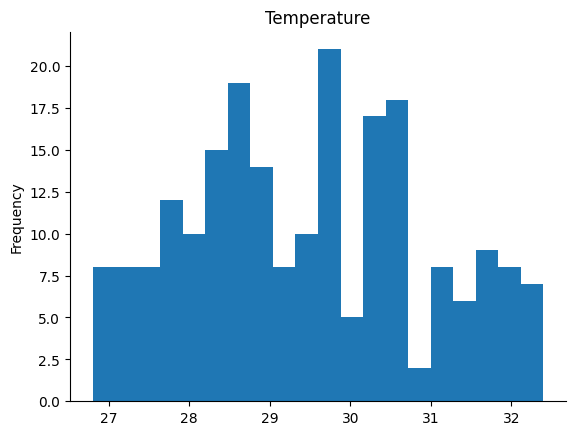

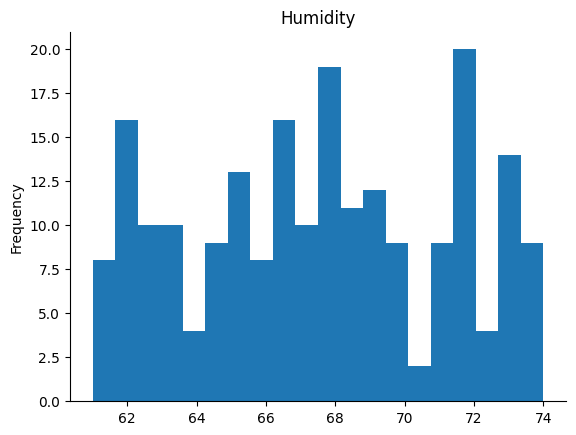

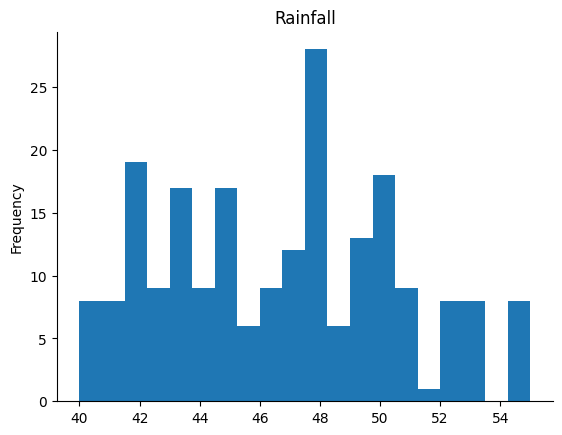

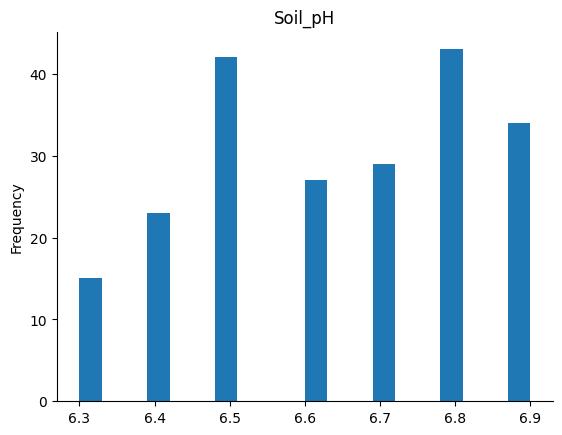

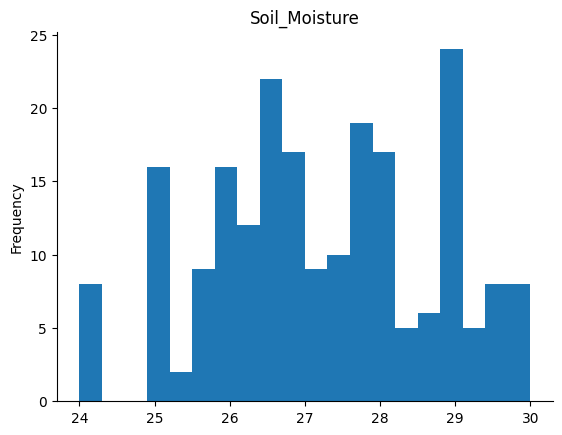

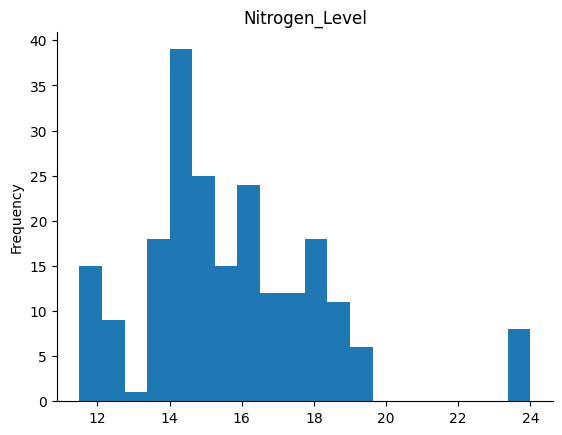

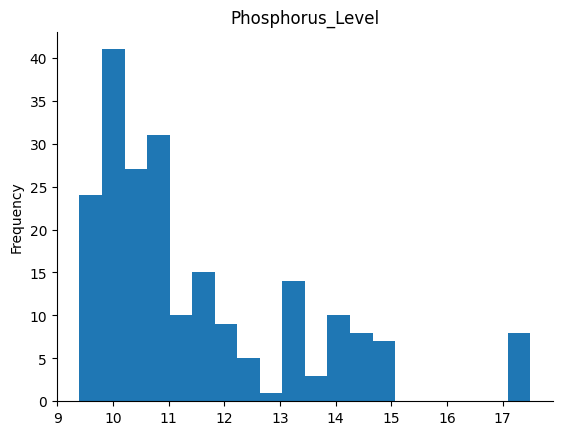

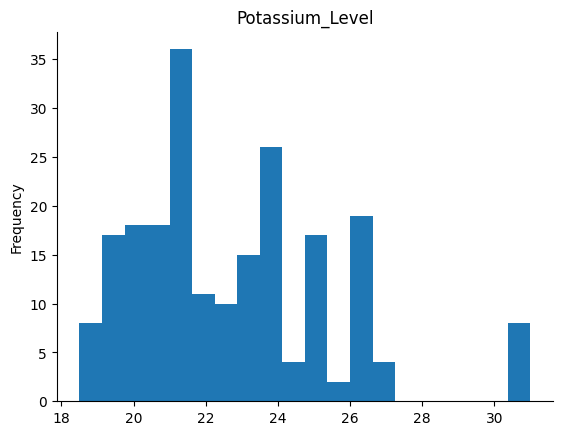

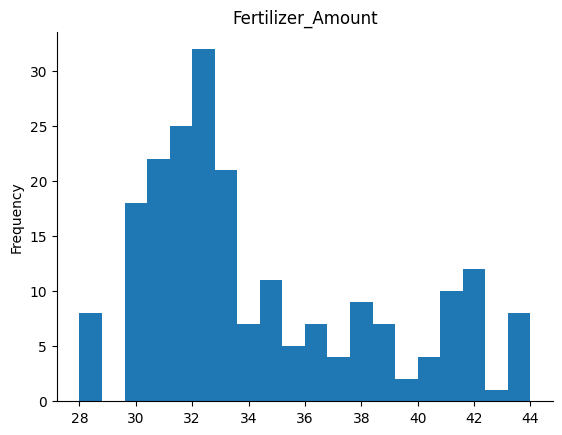

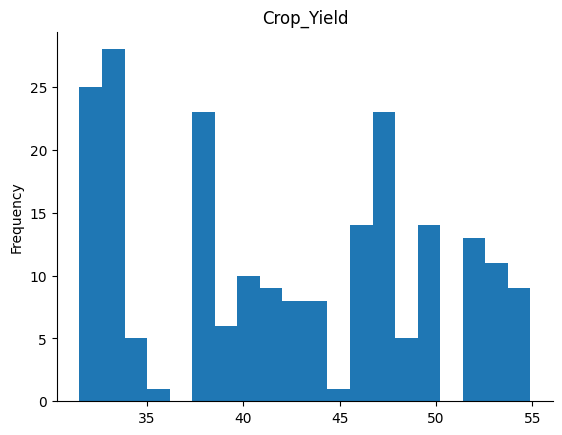

In [9]:
# Plotting histograms for numeric columns
for factor in factors:
    df[factor].plot(kind='hist', bins=20, title=factor)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

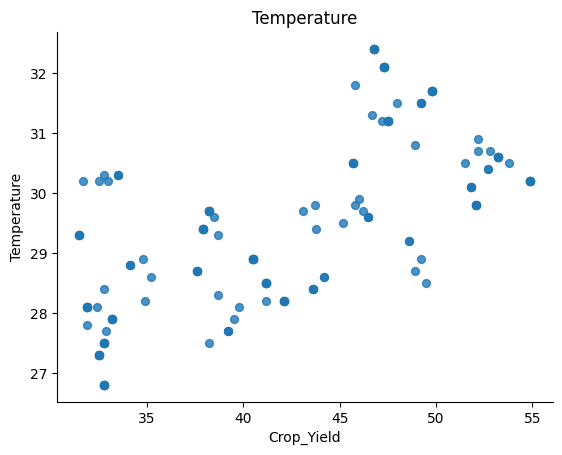

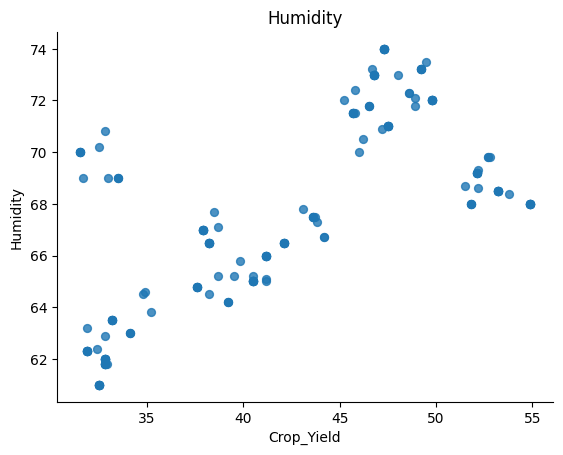

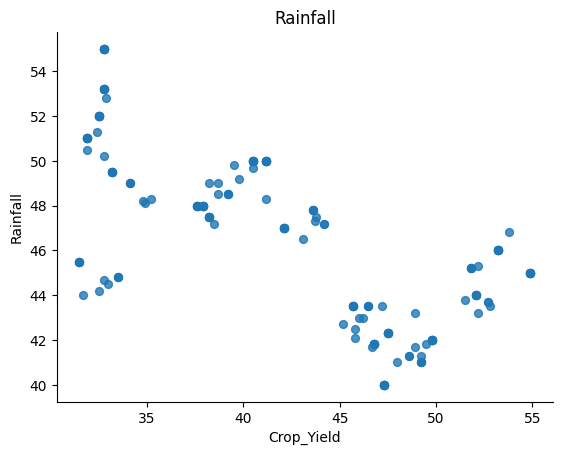

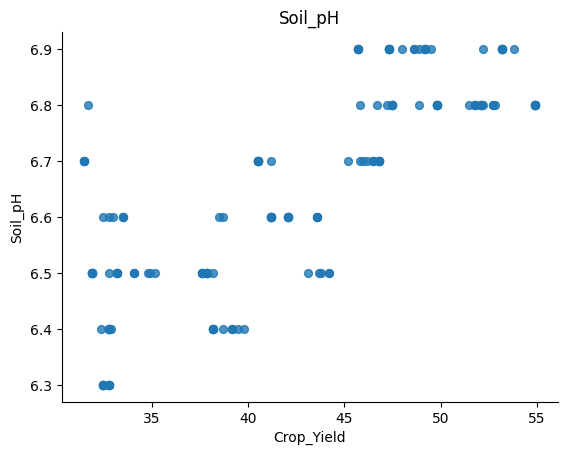

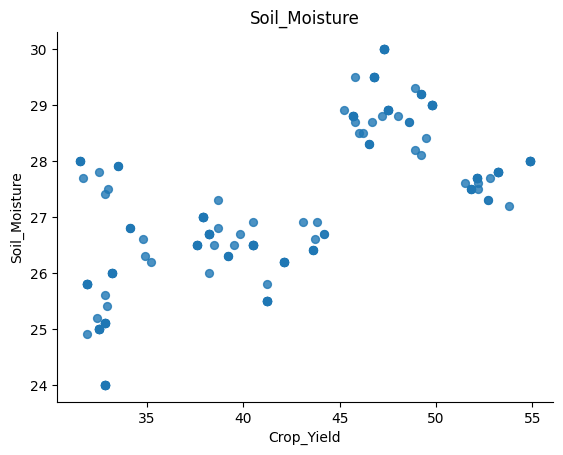

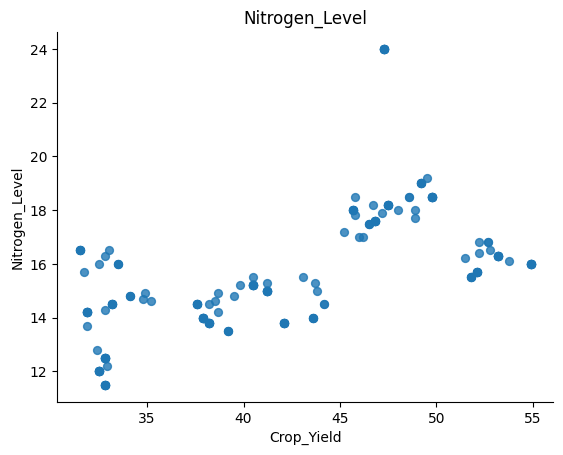

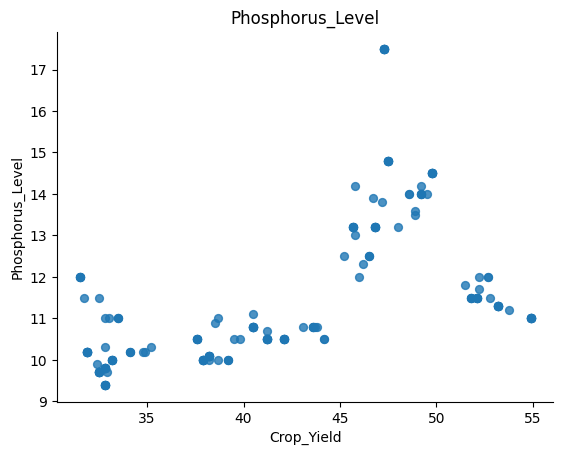

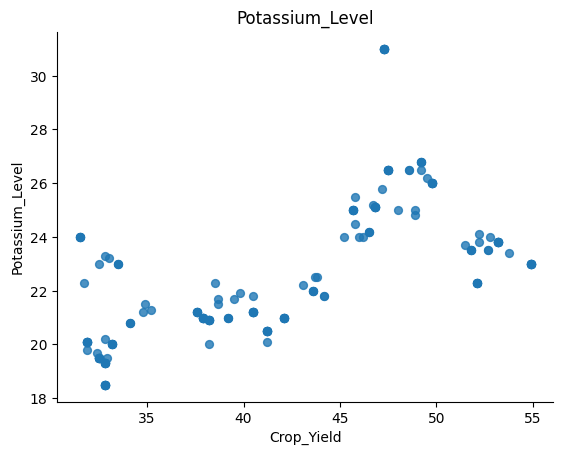

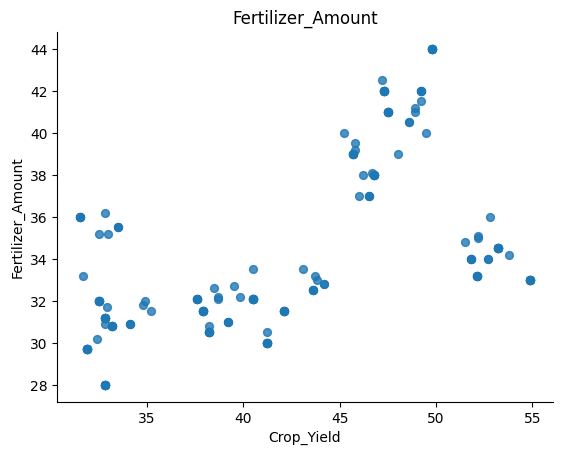

In [10]:
# Scatter plots before removing duplicates
for factor in factors[:-1]:  # Exclude Crop_Yield
    df.plot(kind='scatter', x='Crop_Yield', y=factor, s=32, alpha=.8, title=factor)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

In [11]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

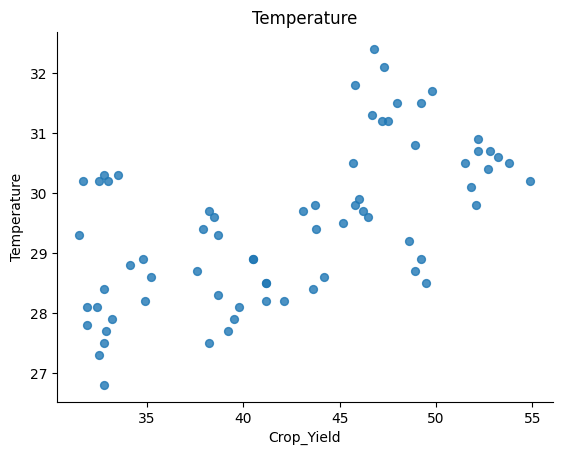

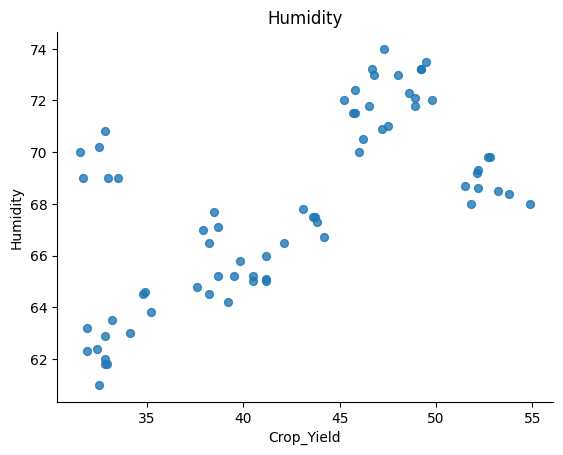

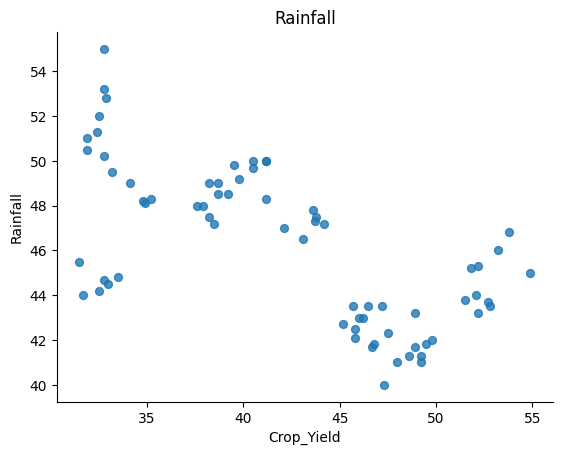

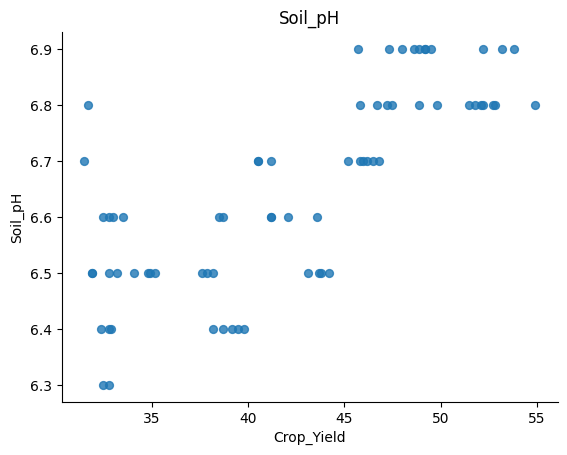

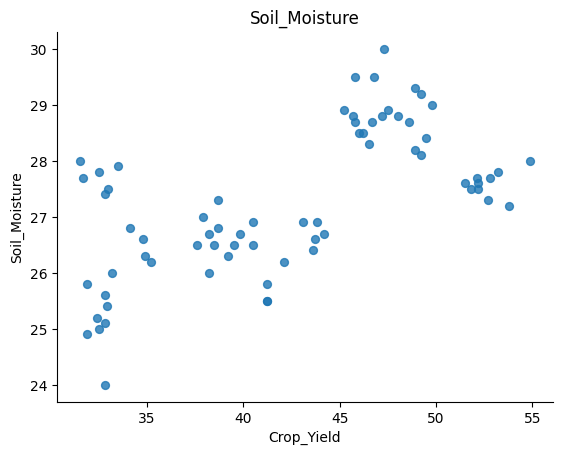

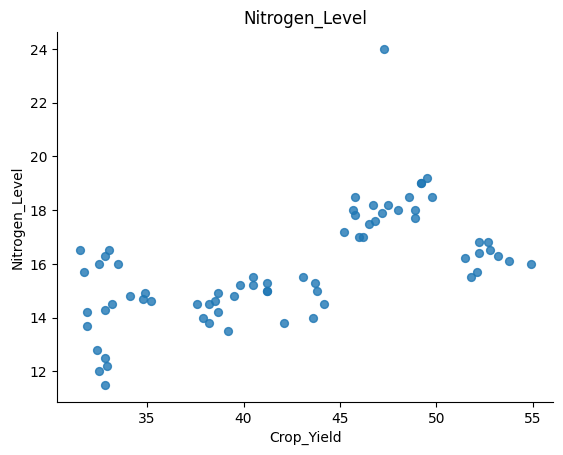

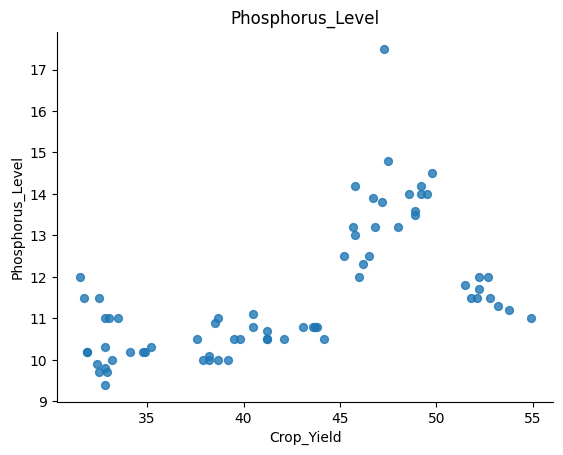

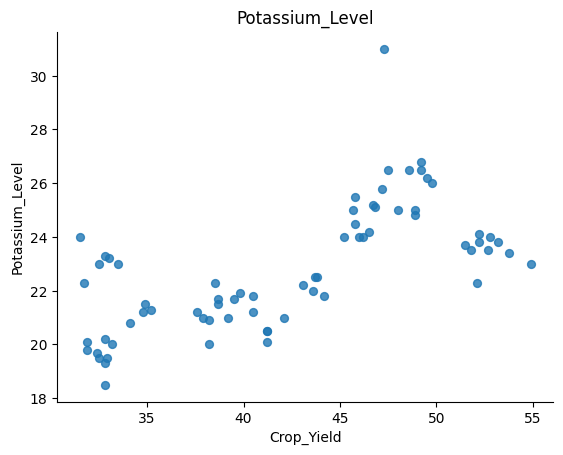

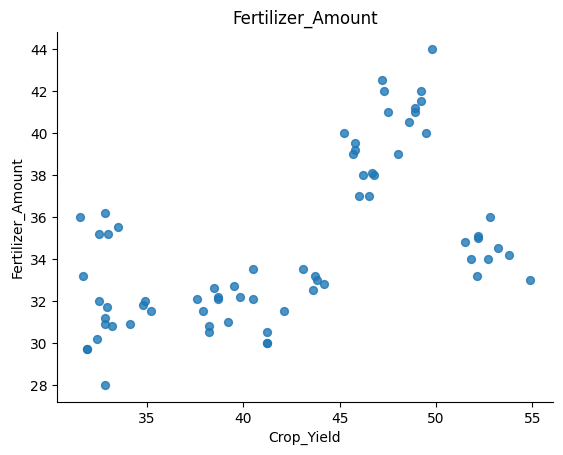

In [12]:
# Scatter plots after removing duplicates
for factor in factors[:-1]:  # Exclude Crop_Yield
    df.plot(kind='scatter', x='Crop_Yield', y=factor, s=32, alpha=.8, title=factor)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

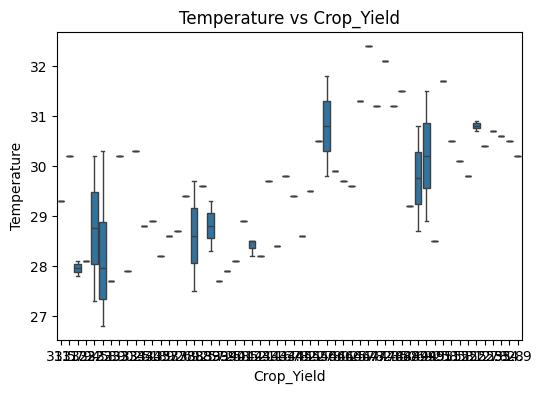

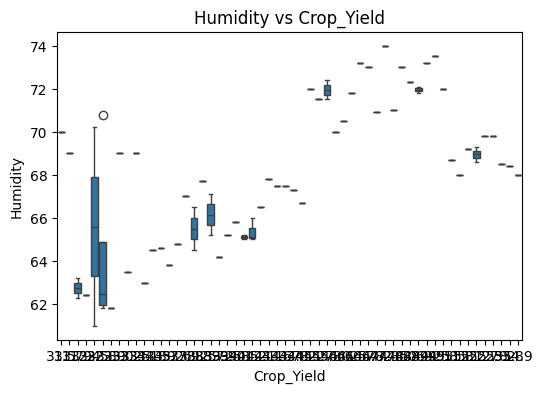

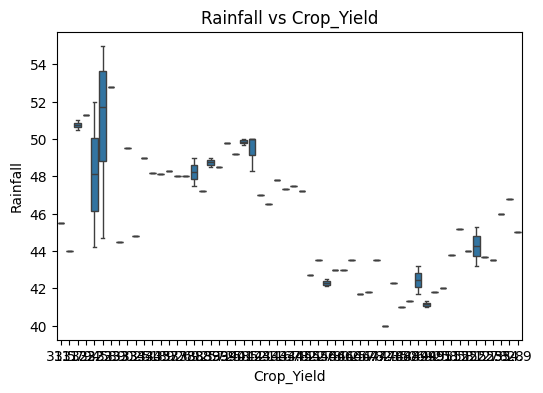

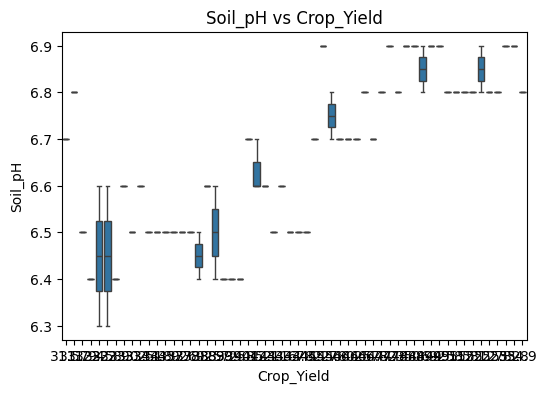

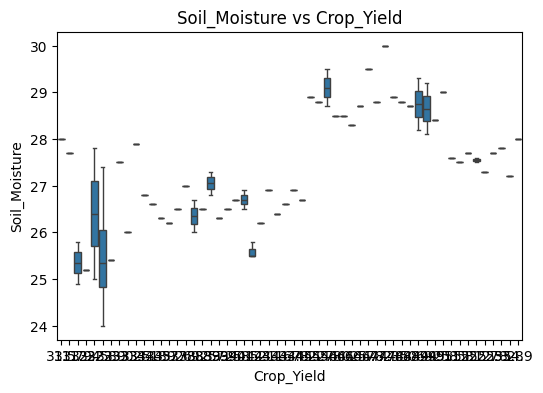

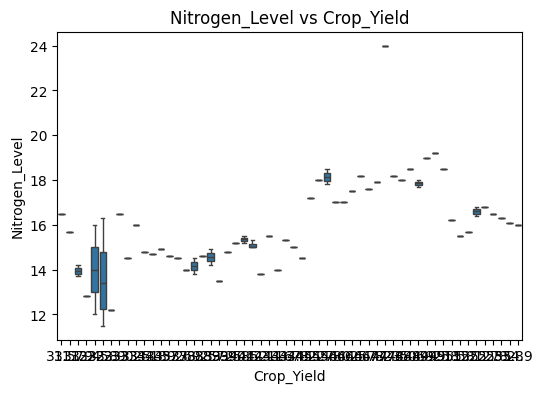

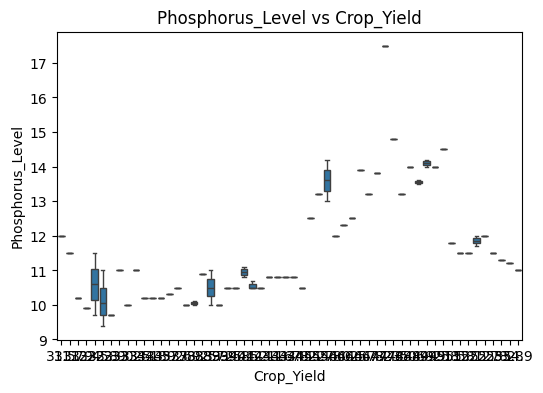

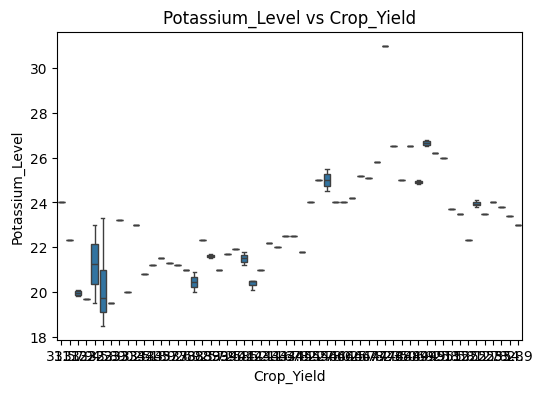

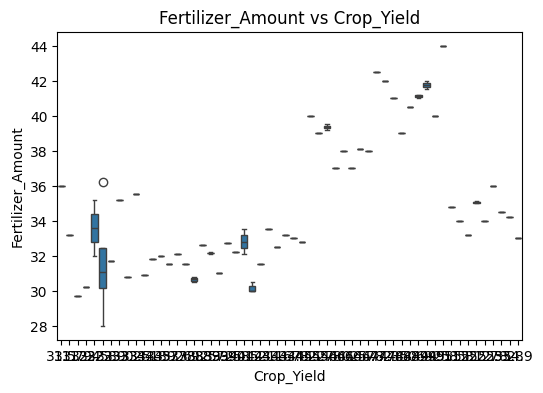

In [13]:
# Box plots after removing duplicates
for factor in factors[:-1]:  # Exclude Crop_Yield
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Crop_Yield', y=factor, data=df)
    plt.title(factor + ' vs Crop_Yield')
    plt.show()

In [14]:
# Removing outliers using IQR method
for factor in factors[:-1]:  # Exclude Crop_Yield
    Q1 = df[factor].quantile(0.25)
    Q3 = df[factor].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[factor] < (Q1 - 1.5 * IQR)) | (df[factor] > (Q3 + 1.5 * IQR)))]

In [24]:
# Drop unwanted columns
df = df.drop(columns=['Crop_Type'])

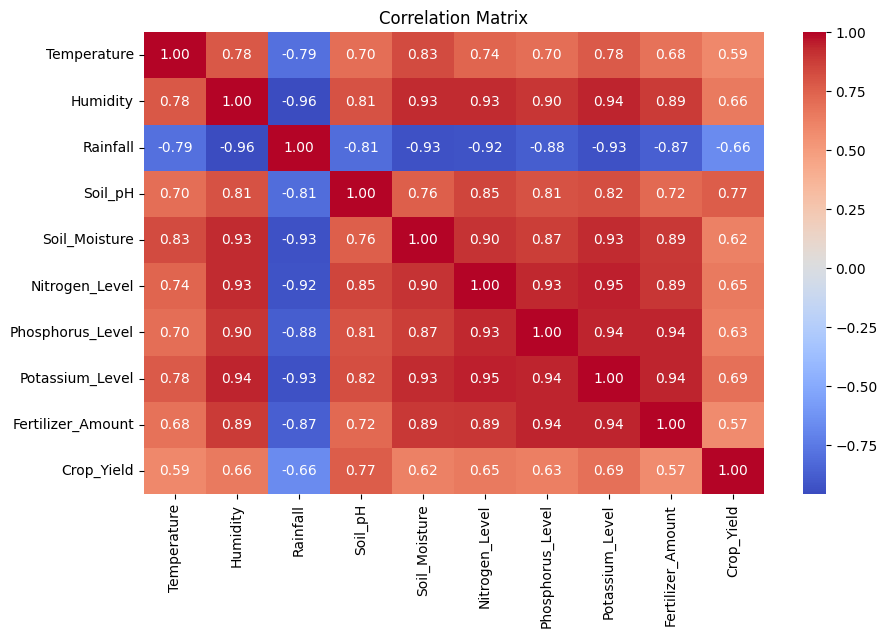

In [25]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Drop index column before save cleaned dataset
df.reset_index(drop=True)

,Temperature,Humidity,Rainfall,Soil_pH,Soil_Moisture,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Fertilizer_Amount,Crop_Type,Crop_Yield
0,28.2,65.1,48.3,6.7,25.8,15.3,10.7,20.1,30.5,NaN,41.2
1,30.5,68.4,46.8,6.9,27.2,16.1,11.2,23.4,34.2,NaN,53.8
2,27.8,63.2,50.5,6.5,24.9,13.7,10.2,19.8,29.7,NaN,31.9
3,31.3,73.2,41.7,6.8,28.7,18.2,13.9,25.2,38.1,NaN,46.7
4,29.6,67.7,47.2,6.6,26.5,14.6,10.9,22.3,32.6,NaN,38.5
...,...,...,...,...,...,...,...,...,...,...,...
64,28.1,65.8,49.2,6.4,26.7,15.2,10.5,21.9,32.2,NaN,39.8
65,30.3,70.8,44.7,6.6,27.4,16.3,11.0,23.3,36.2,NaN,32.8
66,28.9,73.2,41.3,6.9,28.1,19.0,14.2,26.5,41.5,NaN,49.2
67,29.8,67.5,47.3,6.5,26.6,15.3,10.8,22.5,33.2,NaN,43.7


In [26]:
df.to_csv('/content/Data_clean.csv', index=False)

# Part B (Regressors and Model evaluation)

In [27]:
# add imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [28]:
# Load the cleaned dataset
df = pd.read_csv('/content/Data_clean.csv', index_col=False)

In [29]:
# Selecting features and target variable
X = df.drop(columns=['Crop_Yield'])
y = df['Crop_Yield']

In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

In [32]:
# Ridge Regression
ridge_reg = Ridge(alpha=0.5)  # Adjust alpha as needed
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)

In [33]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)

In [34]:
# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")

evaluate_model(y_test, linear_reg_pred, "Linear Regression")
evaluate_model(y_test, ridge_reg_pred, "Ridge Regression")
evaluate_model(y_test, rf_reg_pred, "Random Forest Regression")

Linear Regression Evaluation:
Mean Squared Error: 18.31023070804803
R-squared Score: 0.6925286824214005

Ridge Regression Evaluation:
Mean Squared Error: 21.647934944921506
R-squared Score: 0.636480873097617

Random Forest Regression Evaluation:
Mean Squared Error: 13.539006000000054
R-squared Score: 0.7726486312542828



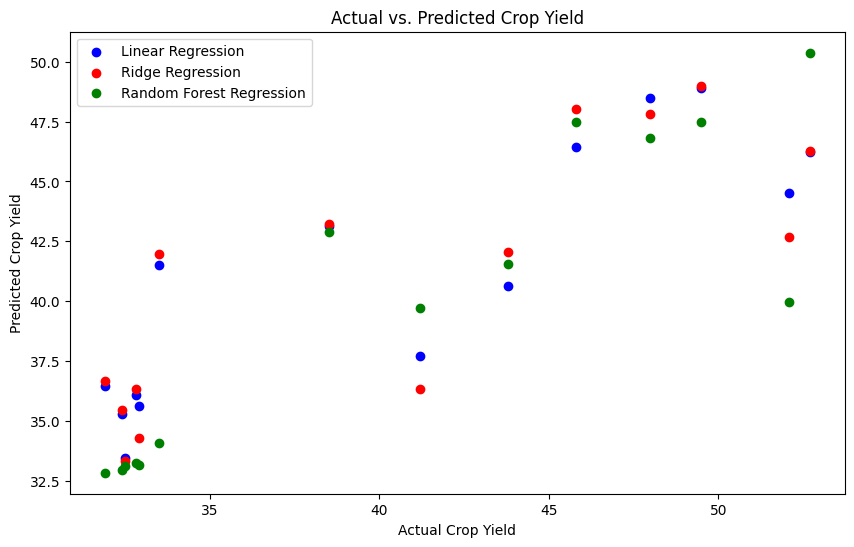

In [35]:
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, ridge_reg_pred, color='red', label='Ridge Regression')
plt.scatter(y_test, rf_reg_pred, color='green', label='Random Forest Regression')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs. Predicted Crop Yield')
plt.legend()
plt.show()